In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Iris classification

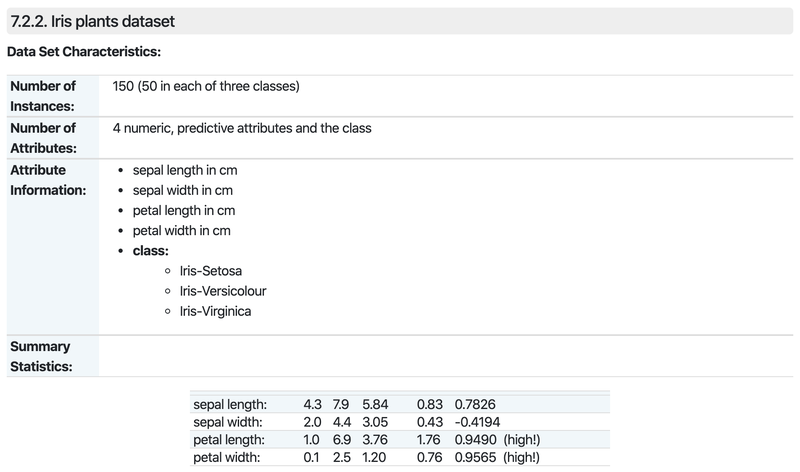

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
print(dir(iris))

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# 3가지 종류의 꽃 각 50개씩, petal length,width, sepal length,width 총 4개의 레이블

iris_data = iris.data
print(iris_data.shape)

(150, 4)


In [6]:
iris_label = iris.target
print(iris_label.shape)
iris_label

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Pandas 를 이용해서 다뤄보자

In [12]:
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


- 정답 데이터를 추가해주자

In [13]:
iris_df['label'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 용어를 잘 기억해두자!
- 문제지 : ML 모델에 입력되는 데이터.feature 라고 부르기도 함. 변수 이름으로는 X
- 정답지 : ML 모델이 맞추어야 하는 데이터. labe, target 이라고 부르기도 함. 변수 이름으로는 y

In [16]:
# train, test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=7)   
#random_state는 데이터 순서대로 train, test에 들어가지 않게 적절히 순서를 섞는 과정이다.

print("X_train 갯수 : ",len(X_train), "  X_test 갯수 : ",len(X_test))

X_train 갯수 :  120   X_test 갯수 :  30


### 우리가 할 것은 머신러닝 중에서 지도학습, 그 중에서도 분류 이다!

- 여러 분류모델들을 이용해보고, 특성을 파악해보자

In [18]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state = 32)
print(decision_tree._estimator_type)

classifier


In [19]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=32)

In [20]:
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

In [21]:
y_test

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

In [22]:
# 결과에 대한 수치 확인
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

##### 다른 모델을 사용해보자

- Random Forest

In [23]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 21)

random_forest = RandomForestClassifier(random_state = 32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



- SVM (Support Vector Machine)
SVM은 train 데이터를 비선형 mapping을 통해 고차원으로 변환한다. 이 새로운 차원에서 hyperplane을 최적으로 분리하는 선형분리를 찾는다. 즉, 최적의 의사결정 영역을 찾는다.
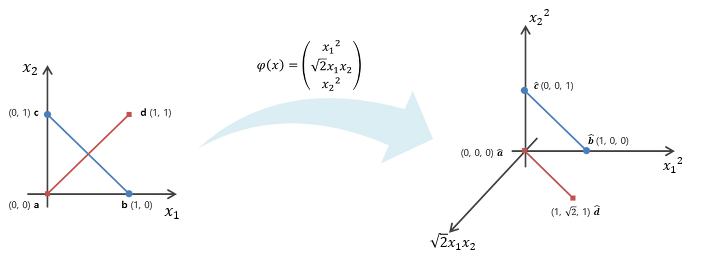
위 그림을 보면 2차원에서는 non-linearly seperable 하지만 3차원으로 mapping 하면 linearly seperable 하다는 것을 볼 수 있다.
SVM은 복잡한 비선형 의사결정 영역을 모형화 할 수 있기 때문에 매우 정확하고, 다른 모델보다 overfitting 되는 경향이 적다.

In [24]:
from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.83      0.87        12
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30



- Stocahstic Gradient Descendant Classifier
https://scikit-learn.org/stable/modules/sgd.html

In [26]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



- Logistic Regression
회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘
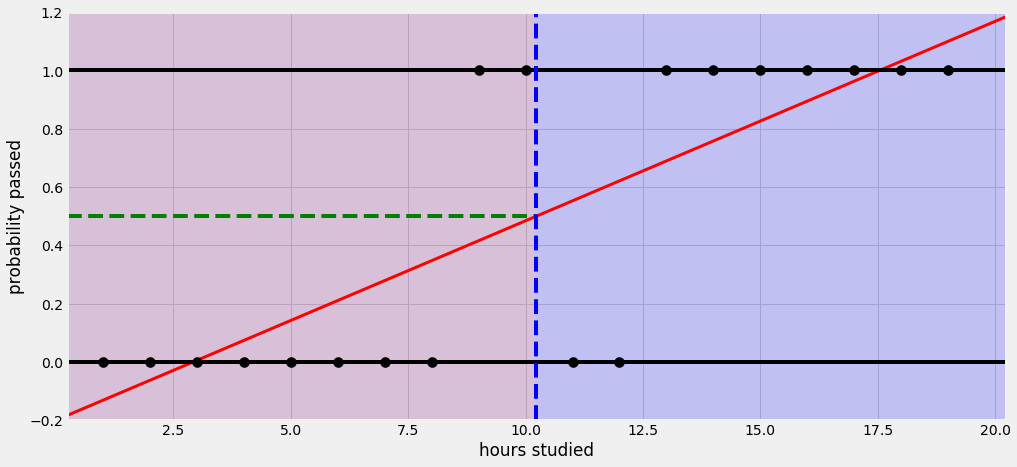
공부 시간에 따라 합격률 확률이 달라진다고 해보자. 선형 회귀를 사용하며 위 같은 그림으로 나타낼 수 있다.
하지만 이 회귀선을 살펴보면 '선' 이어서 공부를 2시간도 안 하면 합결할 확률이 0이 된다고 한다...

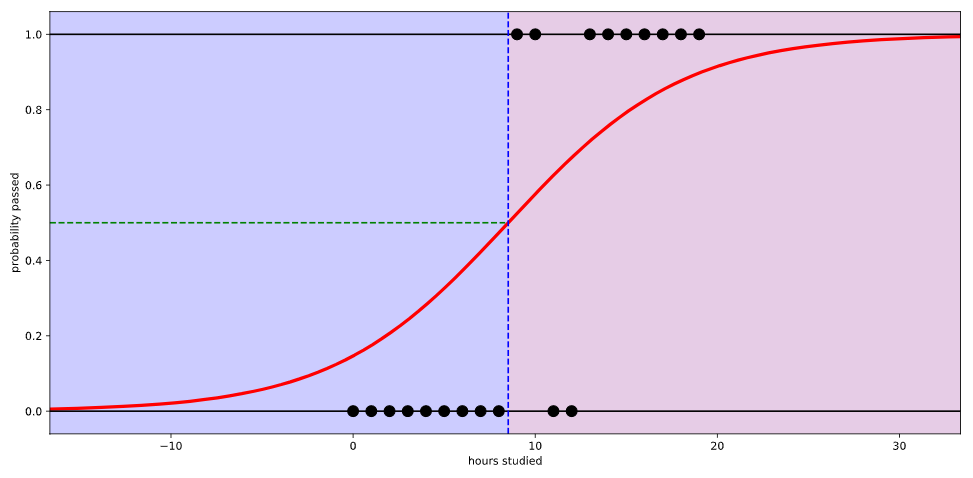
반면 로지스틱 회귀는 납득이 좀 간다.

In [27]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



### 정확도에 대하여

In [28]:
from sklearn.datasets import load_digits

digits = load_digits()
digits_data = digits.data
digits_data.shape

(1797, 64)

In [29]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

- (8x8) 이미지를일렬로 쭉 펴놓아서 64개의 숫자로 이루어진 배열이 나오는 것이다. 확인해보면,

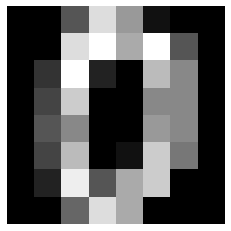

In [31]:
plt.imshow(digits.data[0].reshape(8,8), cmap='gray')
plt.axis('off')
plt.show()

- 여러 개의 이미지 확인

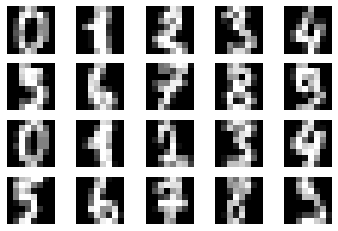

In [34]:
for i in range(20):
    plt.subplot(4,5, i+1)
    plt.imshow(digits.data[i].reshape(8,8), cmap='gray')
    plt.axis('off')
plt.show()

In [36]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- 숫자 10개를 분류하는 것이 아닌, 이미지 데이터가 3인지 아닌지를 맞추는 문제로 변형해보자

In [37]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label

[0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [38]:
X_train,  X_test,  y_train, y_test = train_test_split(digits_data, new_label, test_size=0.2, random_state = 7)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9638888888888889

- 0과 3 분류를 해본 결과 높은 성능이 나왔다. 하지만 여기서 함정은, label 중 0 이 90%, 3이 10% 라는 점이다. 이 말은 정답을 모두 0으로 찍어도 정확도가 90%는 나온다는 것이다.

- 즉, 정확도는 모델의 성능을 잘 평가하지 못 하는 척도가 될 수 있다는 것이다.

### 다양하게 평가해보기

- Confusion Matrix

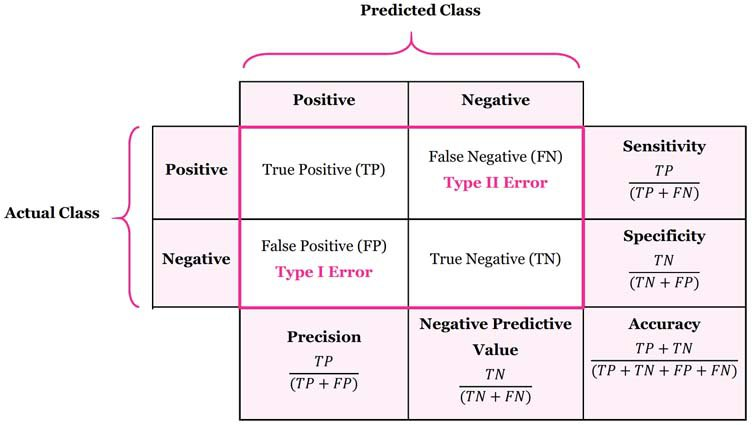

TP : 실제 환자에게 양성 판정   
FN : 실제 환자에게 음성 판정   
FP : 건강한 사람에게 양성 판정   
TN : 건강한 사람에게 음성 판정   

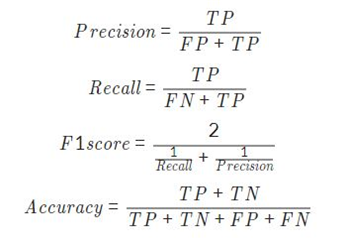


- Recall 과 Precision 중 언제 무엇을 쓸 지 잘 생각해야 한다.   

예를 들자면, 전체 메일함에서 스팸 메일(positive) 을 거르는 모델에게는 정상 모델을 스팸 에일로 분류하는 것이 큰 문제이므로 Precision 이 중요할 것이고,   
암 환자를 진단하는 경우에는 실제 환자를 한 명이라도 놓치면 안 되므로 양성을 음성으로 판단하면 안 되기 때문에 Recall 이 더 중요할 것이다.


##### 예시를 들어보자

육상선수 여부 / 예측값     
          0     /       1   
          1     /       1   
          1     /       1   
          0     /       1   
          1     /       1   
          0     /       0    
          0     /       0   
          0     /       0   
          1     /       1   
          0     /       0   
          0     /       0   
          1     /       1   
          0     /       1     

True : 육상 선수 / False : 일반 사람
- TP : 육상 선수를 육상 선수로 예측한 것 -> 5
- TN : 일반 사람을 일반 사람으로 예측한 것 -> 5
- FP : 일반 사람을 육상 선수로 예측한 것 -> 3
- FN : 육상 선수를 일반 선수로 예측한 것 -> 0   


- Recall : TP / (FN + TP) = 1
- Precision : TP / (FP + TP) = 0.625
- F1 score : 2 / ((1 / Recall) + (1 / Precision)) = 0.7692
- Accuracy : (TP + TN) / (TP + TN + FP + FN) = 0.7692